# Data generation

### Load packages

In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch

import scipy.io
from scipy.io import loadmat

## Load data from Matlab solutions

In [88]:
import scipy.io

# Initialize an empty list to store the loaded data
all_data = []

# Loop to load the .mat files from data_sigma_no1.mat to data_sigma_no10.mat
for i in range(1, 11):
    # Construct the filename dynamically
    filename = f'dataFNO/data_sigma_no{i}.mat'
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(filename)
    
    # Print the name of the loaded file
    print(f'Loaded: {filename}')
    
    # Store the loaded data in the list
    all_data.append(mat_data)

# Now all_data contains the loaded data from all 10 files

Loaded: dataFNO/data_sigma_no1.mat
Loaded: dataFNO/data_sigma_no2.mat
Loaded: dataFNO/data_sigma_no3.mat
Loaded: dataFNO/data_sigma_no4.mat
Loaded: dataFNO/data_sigma_no5.mat
Loaded: dataFNO/data_sigma_no6.mat
Loaded: dataFNO/data_sigma_no7.mat
Loaded: dataFNO/data_sigma_no8.mat
Loaded: dataFNO/data_sigma_no9.mat
Loaded: dataFNO/data_sigma_no10.mat


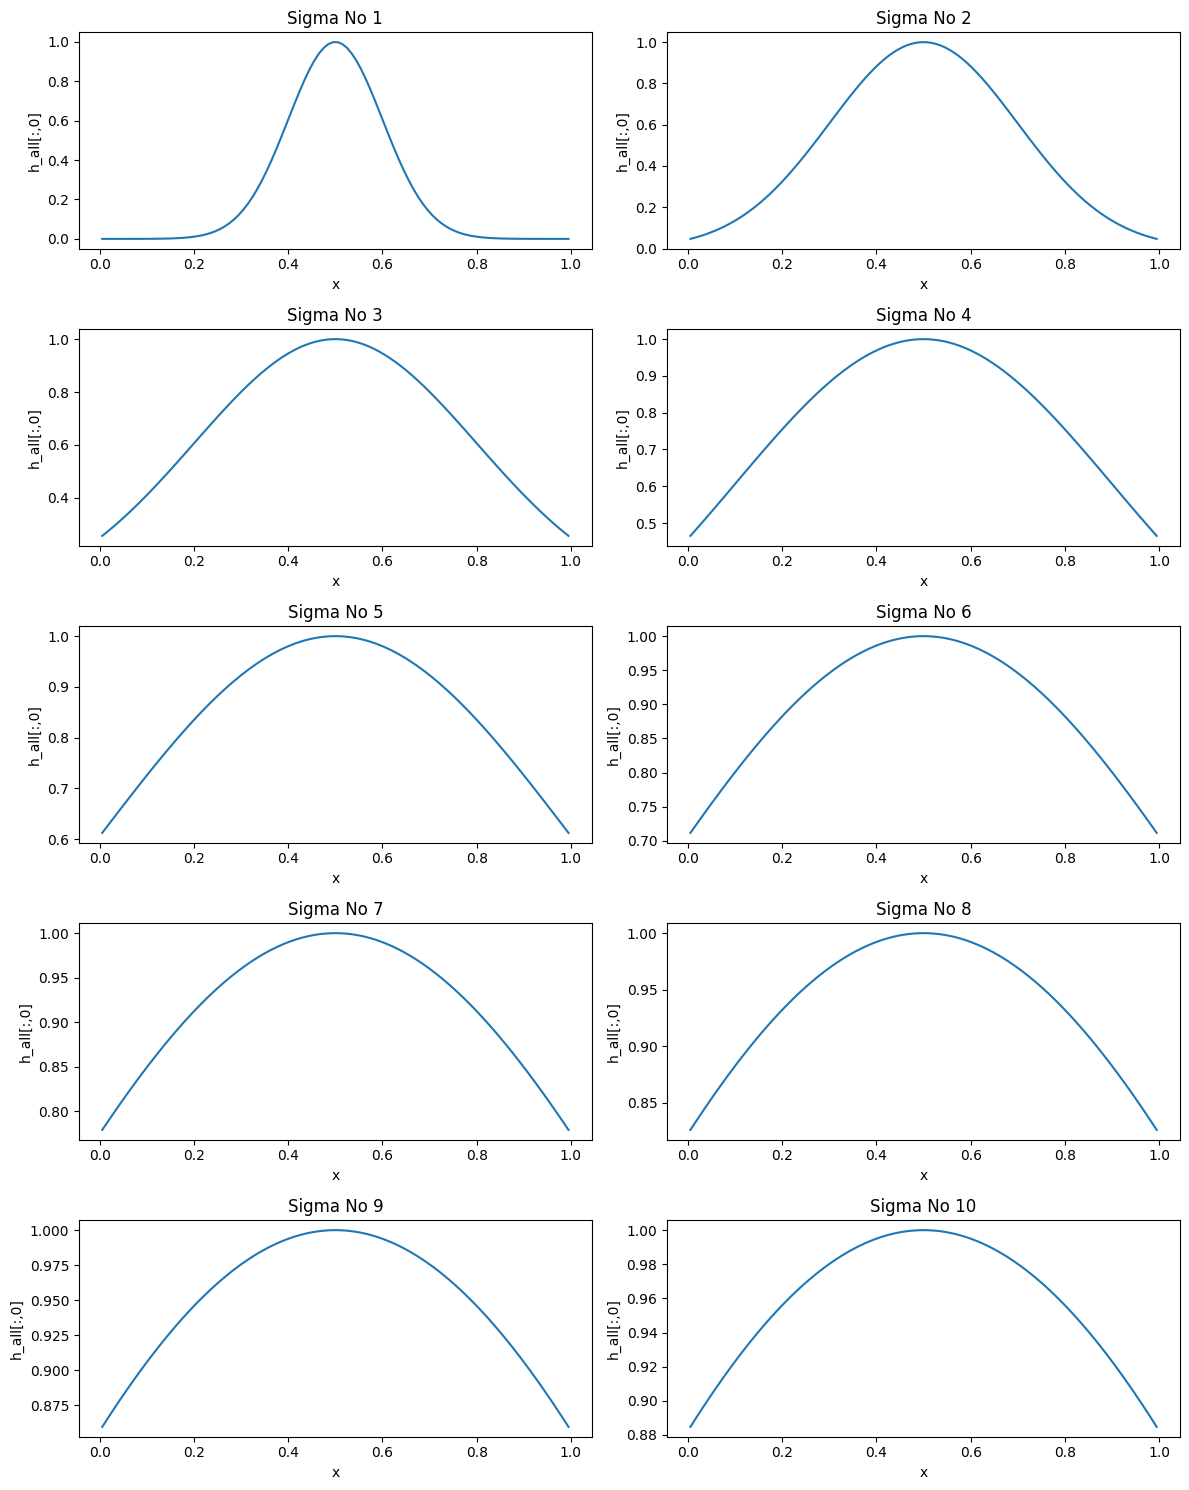

In [89]:
# Initialize the number of subplots
num_plots = 10
fig, axs = plt.subplots(5, 2, figsize=(12, 15))  # 5 rows, 2 columns of subplots

# Loop over the loaded data in all_data
for i in range(num_plots):
    # Extract the necessary data (x and h_all) from all_data
    mat_data = all_data[i]  # Get the data for the i-th file
    x = mat_data['x'].flatten()  # Flatten if it's a 2D array
    h_all = mat_data['h_all']
    
    # Plot x against the first column of h_all
    row = i // 2
    col = i % 2
    axs[row, col].plot(x, h_all[0, :])
    axs[row, col].set_title(f'Sigma No {i+1}')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('h_all[:,0]')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


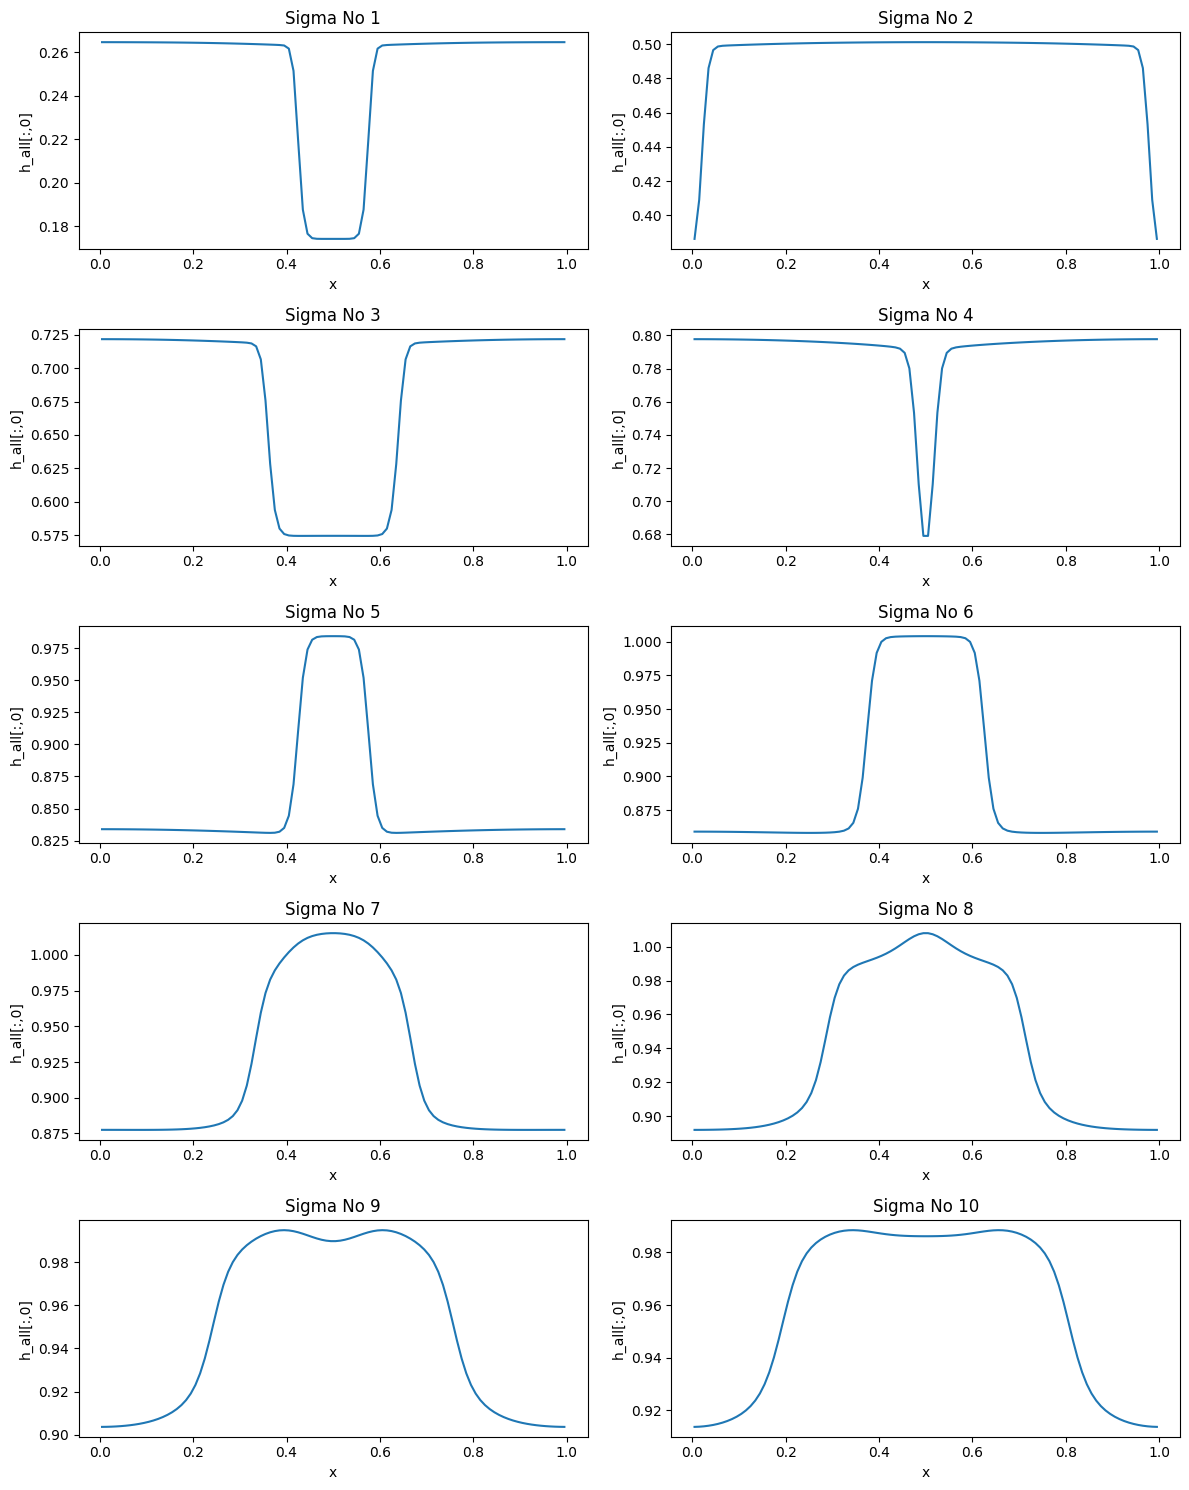

In [96]:
# Initialize the number of subplots
num_plots = 10
fig, axs = plt.subplots(5, 2, figsize=(12, 15))  # 5 rows, 2 columns of subplots

# Loop over the loaded data in all_data
for i in range(num_plots):
    # Extract the necessary data (x and h_all) from all_data
    mat_data = all_data[i]  # Get the data for the i-th file
    x = mat_data['x'].flatten()  # Flatten if it's a 2D array
    h_all = mat_data['h_all']
    
    # Plot x against the first column of h_all
    row = i // 2
    col = i % 2
    axs[row, col].plot(x, h_all[-1, :])
    axs[row, col].set_title(f'Sigma No {i+1}')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('h_all[:,0]')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


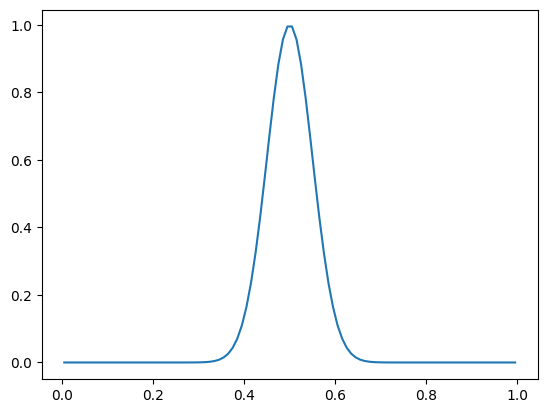

In [90]:
# Define gauss
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2 / (2 * sigma**2))

plt.plot(x,gauss(x, 0.5, 0.05))
plt.show()

In [91]:
# Import numerical solution from Matlab
mat_data = loadmat('dataFNO/data_sigma_no1.mat')
time_all = mat_data['time_all'][:,0]
x = mat_data['x'][0]
h_all = mat_data['h_all']
u_all = mat_data['u_all']
sigma = float(mat_data['sigma'][0][0])
h0 = float(mat_data['h0'][0,0])

In [92]:
print(time_all.shape)
print(h_all.shape)
print(u_all.shape)
print(x.shape)

(304,)
(305, 100)
(305, 100)
(100,)


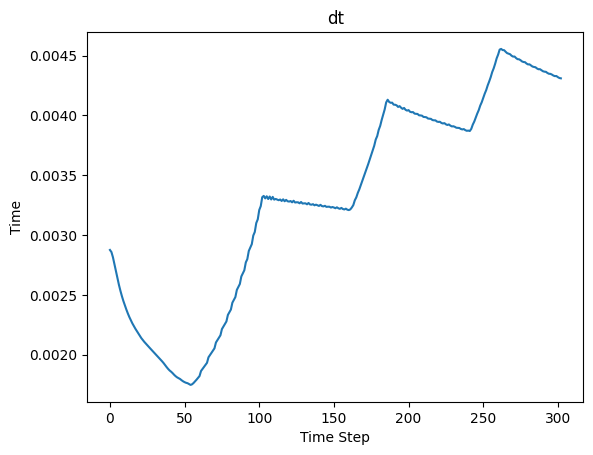

In [93]:
# Plot the time steps difference
plt.plot(np.diff(time_all))
plt.xlabel('Time Step')
plt.ylabel('Time')
plt.title('dt')
plt.show()


In [94]:
print('There are {} time points and {} spatial points'.format(time_all.shape[0], x.shape[0]))
print('Sigma is',sigma,'.')
print('The amplitude of the initial condition is', h0,'.')

There are 304 time points and 100 spatial points
Sigma is 0.1 .
The amplitude of the initial condition is 1.0 .


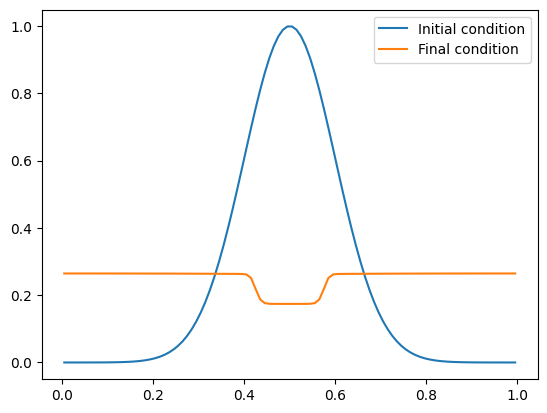

In [95]:
plt.plot(x, h_all[0,:], label='Initial condition')
plt.plot(x, h_all[-1,:], label='Final condition')
plt.legend()
plt.show()
